In [ ]:
!sudo pip install xgboost

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#load csv
b = pd.read_csv('clean RE and raw df NO nulls.csv')

<ipython-input-6-9dcb9e1b1169>:2: DtypeWarning: Columns (3,4,6,7,8,12,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  b = pd.read_csv('clean RE and raw df NO nulls.csv')


In [ ]:
'''initial xgboost with RE and raw datas, predicting if will become any sort of lead. No duplication of rare classes and no feature engenearing.'''

In [ ]:
'''
predicters:
'Property City', 'Property State', 'Property Zip', 'Mailing City', 'Mailing State', 'Mailing Zip'
'Bedroom', 'Bathroom', 'Apporx Sqft','Lot Size Sqft', 'Effective Year Built', 'House Type',
'Tax Assessed Value', 'Last Sold Price','same_address'

target:
'Lead at all'
'''

"\npredicters: \n'Property City', 'Property State', 'Property Zip', 'Mailing City', 'Mailing State', 'Mailing Zip'\n'Bedroom', 'Bathroom', 'Apporx Sqft','Lot Size Sqft', 'Effective Year Built', 'House Type',\n'Tax Assessed Value', 'Last Sold Price','same_address'\n\ntarget: \n'Lead at all'\n"

In [ ]:
b.columns

Index(['First Name', 'Last Name', 'Phone Area Code', 'Phone Number',
       'Lead Status', 'score', 'Lead Quality', 'Lead Source', 'Campaign Name',
       'Property Street Address', 'Property City', 'Property State',
       'Property Zip', 'Mailing Street Address', 'Mailing City',
       'Mailing State', 'Mailing Zip', 'Bedroom', 'Bathroom', 'Apporx Sqft',
       'Lot Size Sqft', 'Effective Year Built', 'House Type',
       'Tax Assessed Value', 'Last Sold Price', 'Lead Created Date',
       'download_date', 'same_address'],
      dtype='object')

In [ ]:
#Use one hot encoding for categorical variables.

# Separate encoding for each categorical variable
encoded_property_city = pd.get_dummies(b['Property City'], prefix='Property_City')
encoded_property_state = pd.get_dummies(b['Property State'], prefix='Property_State')
encoded_property_zip = pd.get_dummies(b['Property Zip'].astype(str), prefix='Property_Zip')
encoded_mailing_city = pd.get_dummies(b['Mailing City'], prefix='Mailing_City')
encoded_mailing_state = pd.get_dummies(b['Mailing State'], prefix='Mailing_State')
encoded_mailing_zip = pd.get_dummies(b['Mailing Zip'].astype(str), prefix='Mailing_Zip')
encoded_house_type = pd.get_dummies(b['House Type'], prefix='House Type')
encoded_same_address = pd.get_dummies(b['same_address'], prefix='same_address')
# Combine all the encoded features into a single DataFrame
b_features = pd.concat([
    encoded_property_city,
    encoded_property_state,
    encoded_property_zip,
    encoded_mailing_city,
    encoded_mailing_state,
    encoded_mailing_zip,
    encoded_house_type,
    encoded_same_address,
    # b['Bedroom'],
    # b['Bathroom'],
    # b['Apporx Sqft'],
    # b['Lot Size Sqft'],
    # b['Effective Year Built'],
    # b['Tax Assessed Value'],
    # b['Last Sold Price'],
], axis=1)

In [ ]:
# Separating features and target
X = b_features
y = b['Lead at all']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Training the model
model = XGBClassifier(n_estimators=10, max_depth=5, learning_rate=0.1, objective= 'binary:logistic')
model.fit(X_train, y_train, eval_set=[(X_test, y_test)],eval_metric=["logloss", "error", "auc"],)


# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='binary')
precision = precision_score(y_test, y_pred, average='binary')

print(f"Test Accuracy: {accuracy}")
print(f"Test Recall: {recall}")
print(f"Test Precision: {precision}")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.13150	validation_0-error:0.00962	validation_0-auc:0.99435
[1]	validation_0-logloss:0.11712	validation_0-error:0.00962	validation_0-auc:0.99441
[2]	validation_0-logloss:0.10489	validation_0-error:0.00962	validation_0-auc:0.99441
[3]	validation_0-logloss:0.09424	validation_0-error:0.00962	validation_0-auc:0.99479
[4]	validation_0-logloss:0.08484	validation_0-error:0.00395	validation_0-auc:0.99479
[5]	validation_0-logloss:0.07653	validation_0-error:0.00091	validation_0-auc:0.99480
[6]	validation_0-logloss:0.06913	validation_0-error:0.00091	validation_0-auc:0.99481
[7]	validation_0-logloss:0.06253	validation_0-error:0.00091	validation_0-auc:0.99481
[8]	validation_0-logloss:0.05663	validation_0-error:0.00089	validation_0-auc:0.99482
[9]	validation_0-logloss:0.05135	validation_0-error:0.00089	validation_0-auc:0.99482
Accuracy: 0.999105449049154


In [ ]:
# Print evaluation results
results = model.evals_result()
for metric in results['validation_0']:
    print(f"{metric}:", results['validation_0'][metric])

logloss: [0.13149650640944158, 0.1171215412249451, 0.10489208160020341, 0.09423535479530895, 0.08484135463180877, 0.0765287778696006, 0.06912955579073253, 0.06253069117870984, 0.05662914755433811, 0.05134857325555724]
error: [0.00962413436772213, 0.00962413436772213, 0.00962413436772213, 0.00962413436772213, 0.00394836281752703, 0.00090997424310193, 0.00090997424310193, 0.00090997424310193, 0.00089455095084597, 0.00089455095084597]
auc: [0.9943534903068992, 0.9944055880529025, 0.9944054882248862, 0.9947892395980206, 0.9947892395980206, 0.9948010692179513, 0.9948087310182019, 0.9948084814481611, 0.994816592474485, 0.9948165176034728]


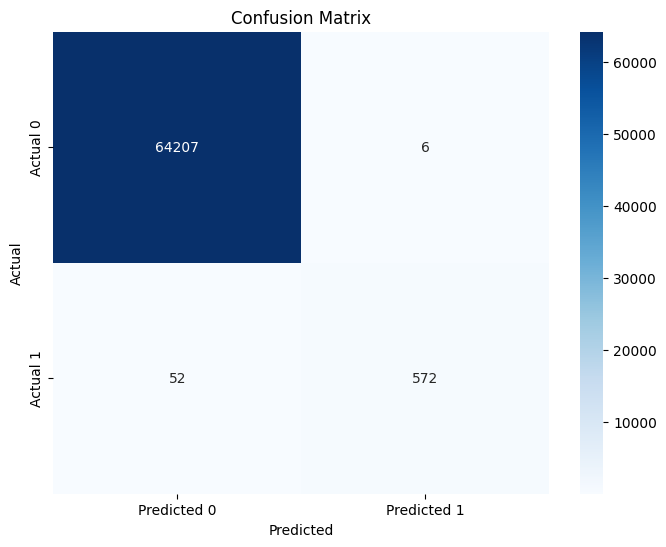

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Fig 1:")
print(cm)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#To see what was predicted wrongly

results_df = X_test.copy()
results_df['true_label'] = y_test.values
results_df['predicted_label'] = y_pred

# Identify false negatives (true_label=1, predicted_label=0)
false_negatives = results_df[(results_df['true_label'] == 1) & (results_df['predicted_label'] == 0)]


# Identify false positives (true_label=0, predicted_label=1)
false_positives = results_df[(results_df['true_label'] == 0) & (results_df['predicted_label'] == 1)]


# Identify true positives (true_label=1, predicted_label=1)
true_positives = results_df[(results_df['true_label'] == 1) & (results_df['predicted_label'] == 1)]


# Identify true negatives (true_label=0, predicted_label=0)
true_negatives = results_df[(results_df['true_label'] == 0) & (results_df['predicted_label'] == 0)]


# If you want to see the rows from the original DataFrame
false_negative_rows = b.loc[false_negatives.index]
false_positive_rows = b.loc[false_positives.index]
true_positive_rows = b.loc[true_positives.index]
true_negative_rows = b.loc[true_negatives.index]

print("Original rows for False Negatives:")
print(false_negative_rows)

# print("Original rows for False Positives:")
# print(false_positive_rows)

# print("Original rows for True Positives:")
# print(true_positive_rows)

# print("Original rows for True Negatives:")
# print(true_negative_rows)

Original rows for False Negatives:
       First Name  Last Name  Phone Area Code    Phone Number  \
550         Gerta     Doreus            786.0  (786) 704-1058   
1108       Lauren     Panton            954.0  (954) 684-1208   
142          Paul       King            407.0  (407) 847-9484   
139        Steven          A            407.0  (407) 709-1976   
121         Louis        NaN            347.0  (347) 893-0928   
1146     Marjorie   Samerson            954.0  (954) 801-1706   
1235         Paul      Lewis            973.0  (973) 493-0471   
70        Richard          L            305.0  (305) 681-2588   
716          John       Clay            813.0  (813) 767-5068   
966         Wayne  Schofield            954.0  (954) 524-0731   
962        Destin   Cherisol            954.0  (954) 512-9481   
838         Vasou      Vasos            954.0  (954) 242-3405   
985       Evelina          P            954.0  (954) 551-7270   
134        Frazer    Johnson            404.0  (404) 45

In [ ]:
'''


predicting what kind of lead it will be


'''

In [ ]:
b.columns

Index(['First Name', 'Last Name', 'Phone Area Code', 'Phone Number',
       'Lead Status', 'score', 'Lead Quality', 'Lead Source', 'Campaign Name',
       'Property Street Address', 'Property City', 'Property State',
       'Property Zip', 'Mailing Street Address', 'Mailing City',
       'Mailing State', 'Mailing Zip', 'Bedroom', 'Bathroom', 'Apporx Sqft',
       'Lot Size Sqft', 'Effective Year Built', 'House Type',
       'Tax Assessed Value', 'Last Sold Price', 'Lead Created Date',
       'download_date', 'same_address'],
      dtype='object')

In [ ]:
b['Lead Quality'].unique()

array(['Bad', 'Ok', 'Good', nan], dtype=object)

In [ ]:
b['score'].unique()

array([ 1,  0,  3,  6, -1,  5,  2,  4,  7, -3])

In [ ]:
#renumber b['score']
rename_dict = {
    -3 : 0,
    -1 : 1,
    0 : 2,
    1 : 3,
    2 : 4,
    3 : 5,
    4 : 6,
    5 : 7,
    6 : 8,
    7 : 9}

# Map values in the 'column_name' column
b['score'] = b['score'].map(rename_dict)

In [ ]:
rename_dict2 = {
     0 : 0,
    'Bad' : 1,
    'Ok' : 2,
    'Good' : 3,}

b['Lead Quality'].fillna(0, inplace = True)
# Map values in the 'column_name' column
b['Lead Quality score'] = b['Lead Quality'].map(rename_dict2)

In [ ]:
b['Lead Quality score'].unique()

array([1, 2, 3, 0])

In [ ]:
# Separating features and target
X2 = b_features
y2 = b['Lead Quality score']

# Splitting the data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.6, random_state=42)

# Training the model
model2 = XGBClassifier(n_estimators=10, max_depth=5, learning_rate=0.1, objective='multi:softmax')
model2.fit(X_train2, y_train2, eval_set=[(X_test2, y_test2)], eval_metric=["mlogloss", "merror"])


# Making predictions
y_pred2 = model2.predict(X_test2)

# Evaluating the model
accuracy2 = accuracy_score(y_test2, y_pred2)
print(f'Accuracy: {accuracy2}')

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-mlogloss:1.19466	validation_0-merror:0.00398
[1]	validation_0-mlogloss:1.04122	validation_0-merror:0.00386
[2]	validation_0-mlogloss:0.91455	validation_0-merror:0.00384
[3]	validation_0-mlogloss:0.80781	validation_0-merror:0.00386
[4]	validation_0-mlogloss:0.71663	validation_0-merror:0.00384
[5]	validation_0-mlogloss:0.63790	validation_0-merror:0.00382
[6]	validation_0-mlogloss:0.56940	validation_0-merror:0.00379
[7]	validation_0-mlogloss:0.50944	validation_0-merror:0.00379
[8]	validation_0-mlogloss:0.45670	validation_0-merror:0.00378
[9]	validation_0-mlogloss:0.41011	validation_0-merror:0.00377
Accuracy: 0.9962341267801141


Confusion Matrix 2:
[[77046     7     0     0]
 [   24   448    42     2]
 [    9   142    16     6]
 [    2    52     7     1]]


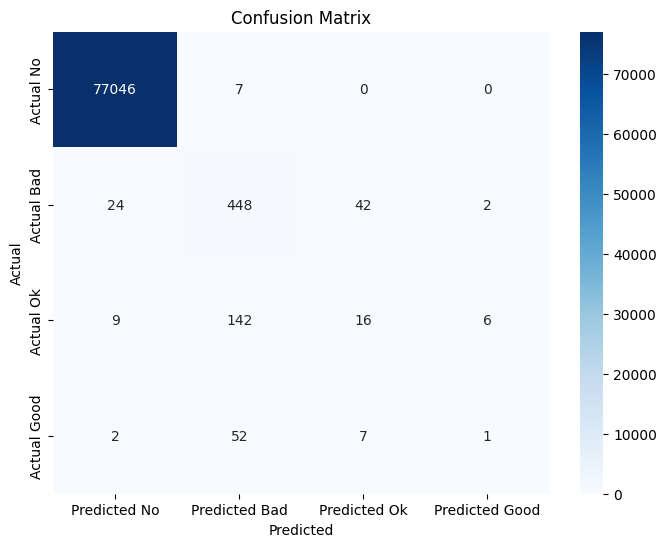

In [ ]:
cm2 = confusion_matrix(y_test2, y_pred2)
print("Confusion Matrix 2:")
print(cm2)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted None', 'Predicted Bad','Predicted Ok','Predicted Good'],
             yticklabels=['Actual No', 'Actual Bad','Actual Ok','Actual Good'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()